In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/benediktas/dev/University/data-science/tennis/tennis_atp/tennis_atpatp_matches_combined.csv")

df.head(3)
df.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

#Out of all features (aces, double faults, 1st serve %) which is the biggest predictor of a match outcome?

In [6]:
first_serve_df = df.dropna(subset=["w_svpt", "w_1stIn", "l_svpt", "l_1stIn" ]).copy()
first_serve_df.shape


(98050, 49)

In [7]:
first_serve_df["w_first_serve_pct"] = first_serve_df["w_1stIn"] / first_serve_df["w_svpt"]
first_serve_df["l_first_serve_pct"] = first_serve_df["l_1stIn"] / first_serve_df["l_svpt"]
first_serve_df["delta_first_serve_pct"] = first_serve_df["w_first_serve_pct"] - first_serve_df["l_first_serve_pct"]

first_serve_df.describe()

,draw_size,match_num,winner_id,winner_seed,winner_ht,winner_age,loser_id,loser_seed,loser_ht,loser_age,...,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,w_first_serve_pct,l_first_serve_pct,delta_first_serve_pct
count,98050.000000,98050.000000,98050.000000,43218.000000,97869.000000,98049.000000,98050.000000,23735.000000,97120.000000,98037.000000,...,98049.000000,98050.000000,98050.000000,97754.000000,96807.000000,97397.000000,96456.000000,98044.000000,98020.000000,98014.000000
mean,57.942907,84.896277,108594.082050,6.965848,185.917042,25.913107,108567.295553,8.361871,185.331343,26.060442,...,12.211150,4.806456,8.717348,64.644741,1500.487186,98.900510,935.867421,0.611299,0.592476,0.018834
std,37.600138,120.114227,20155.309222,6.282631,6.719571,3.815515,20100.790911,6.812229,6.708309,3.906590,...,4.130732,3.275843,4.134125,86.246590,1792.450024,130.862395,1018.449362,0.085740,0.086579,0.113001
min,2.000000,1.000000,100284.000000,1.000000,163.000000,14.900000,100282.000000,1.000000,15.000000,14.500000,...,0.000000,-6.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.125000,0.000000,-0.644231
25%,32.000000,13.000000,102179.000000,3.000000,183.000000,23.100000,102184.000000,4.000000,180.000000,23.200000,...,9.000000,2.000000,6.000000,18.000000,574.000000,36.000000,431.000000,0.553846,0.535714,-0.055360
50%,32.000000,27.000000,103758.000000,5.000000,185.000000,25.600000,103675.000000,6.000000,185.000000,25.800000,...,11.000000,4.000000,8.000000,44.000000,917.000000,68.000000,686.000000,0.611111,0.592593,0.018018
75%,64.000000,108.000000,104925.000000,8.000000,190.000000,28.400000,105031.750000,11.000000,190.000000,28.600000,...,15.000000,7.000000,11.000000,83.000000,1670.000000,110.000000,1065.000000,0.666667,0.649351,0.092044
max,128.000000,1701.000000,212721.000000,35.000000,211.000000,44.600000,212970.000000,35.000000,211.000000,44.000000,...,91.000000,28.000000,38.000000,1890.000000,16950.000000,2159.000000,16950.000000,1.000000,1.000000,1.000000


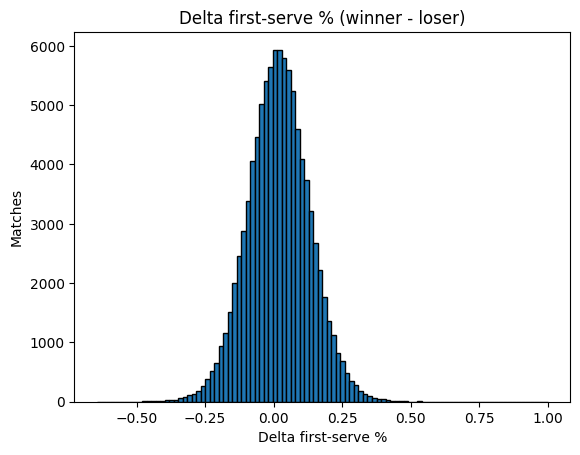

In [8]:
plt.hist(first_serve_df['delta_first_serve_pct'], bins=100, edgecolor='black')
plt.title('Delta first-serve % (winner - loser)')
plt.xlabel('Delta first-serve %')
plt.ylabel('Matches')
plt.show()

In [9]:
# Number: how often does the winner have higher first-serve %?
share = (first_serve_df['delta_first_serve_pct'] > 0).mean()
print('Winner had higher 1st-serve % in:', round(100*share, 2), '% of matches')

Winner had higher 1st-serve % in: 56.5 % of matches
